In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from collections import defaultdict
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LogisticRegression

import recommender_and_other_functions as rof

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', 50)

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(style='white',font_scale=1.2)

In [3]:
df = pd.read_csv("..\Reviews_with_topic_scores.csv", parse_dates = [4])
df_preds = pd.read_csv("..\Reviews_with_topic_presence.csv", parse_dates = [4])
df.head(3)

,attraction_name,attraction_id,user_name,user_profile_link,review_date,helpful_votes,rating,review_link,review_text,review_title,experience_date,reviews_basic_clean,review_lemma,review_remove_stop_words,review_remove_additional_words,review_pos_ent_filter,Outlook_Sentiment,outlook_sentiment_number,review_clean_modeling,Breathtaking Views,Must Visits,Panaromic Photography,Strenuous Hikes,Easy Trails,Gorgeous Sunsets,Stunning Waterfalls,Serene Lakes,Wildlife,Stargazing,Shuttle Bus,Organized Tours,Permit Restrictions,Water Advice,Rock Climbing,Climbing Advice,General Advice,Hiking Advice
0,Glacier Point,g61000-d139187,Lisa,/Profile/lisa_1i,2020-10-01,2.0,5,/ShowUserReviews-g61000-d139187-r774573486-Gla...,"Not too many ppl when we arrive at 3pm, probab...",Glacier point during pandemic,October 2020,not too many ppl when we arrive at pm probabl...,not too many ppl when arrive at pm probably...,not ppl arrive pm probably control visitor day...,not ppl arrive probably control visitor day sm...,ppl arrive probably controlling visitor day sm...,Positive,1,not ppl arrive probably control visitor day sm...,0.999999,0.000087,0.000001,0.000007,0.000264,0.002484,0.000001,0.000105,0.007597,0.000112,0.000009,0.000064,0.000005,0.000002,0.000011,0.021771,0.009667,0.006007
1,Glacier Point,g61000-d139187,Cali4niahiker,/Profile/Cali4niahiker,2020-10-01,NaN,5,/ShowUserReviews-g61000-d139187-r774377599-Gla...,Glacier Point at about 7000 ft elevation can b...,Been here dozens of times. Never gets old!,October 2020,glacier point at about ft elevation can be re...,glacier point at about ft elevation can be r...,glacier point ft elevation reach car shuttle b...,ft elevation reach car shuttle bus not pandemi...,point elevation reached car shuttle bus pandem...,Positive,1,ft elevation reach car shuttle bus not pandemi...,0.999999,0.999999,0.999999,0.999999,0.054381,0.999999,0.999999,0.999999,0.999997,0.999999,0.999999,0.001726,0.999873,0.999999,0.999188,0.004974,0.999999,0.999999
2,Glacier Point,g61000-d139187,Gus6,/Profile/Gus6,2020-10-01,67.0,5,/ShowUserReviews-g61000-d139187-r774013232-Gla...,"The most Iconic view of the half dome, this is...","The most Iconic view of the half dome, this is...",November 2019,the most iconic view of the half dome this is...,the most iconic view of the half dome this b...,iconic view half dome placeit quite big observ...,iconic view placeit quite big observation area...,iconic view placeits big observation area huge...,Positive,1,iconic view placeit quite big observation area...,0.999999,0.000087,0.000001,0.000007,0.002331,0.002452,0.000001,0.000105,0.003078,0.000076,0.000009,0.001760,0.000001,0.000002,0.000001,0.040550,0.096355,0.000299


In [4]:
topics_columns = ['Breathtaking Views', 'Must Visits', 'Panaromic Photography', 'Strenuous Hikes', 'Easy Trails', 'Gorgeous Sunsets', 
          'Stunning Waterfalls', 'Serene Lakes', 'Wildlife',  'Stargazing', 'Shuttle Bus', 'Organized Tours',
          'Permit Restrictions',   'Water Advice','Rock Climbing', 'Climbing Advice', 'General Advice', 'Hiking Advice']

### Topic Importances & Impact

Using Logistic Regression algorithm, we try to ascertain which topics impact a postive or negatice outcome and how much.  
The topic scores for each document are passed as features and the sentiment outcome is used as the predictor variable.

In [8]:
logreg_model = rof.classification_common_model (df[topics_columns], df['outlook_sentiment_number'], LogisticRegression(), \
                          scaler = None, \
                          threshold = 0.5, return_type = 1)

Scores fit on LogisticRegression()
Accuracy: 0.59
Train/Test ratio: 1.07
Precision: 0.98
RECALL: 0.59
Log Loss: 0.65
ROC AUC: 0.65
              precision    recall  f1-score   support

           0       0.06      0.65      0.10        79
           1       0.98      0.58      0.73      2066

    accuracy                           0.59      2145
   macro avg       0.52      0.61      0.42      2145
weighted avg       0.94      0.59      0.71      2145

-----


,Features,Coefficients
15,Climbing Advice,0.716684
0,Breathtaking Views,0.706970
3,Strenuous Hikes,0.620888
12,Permit Restrictions,0.430216
9,Stargazing,0.286069
5,Gorgeous Sunsets,0.221843
7,Serene Lakes,0.190427
2,Panaromic Photography,0.159012
16,General Advice,0.150500
1,Must Visits,0.067125


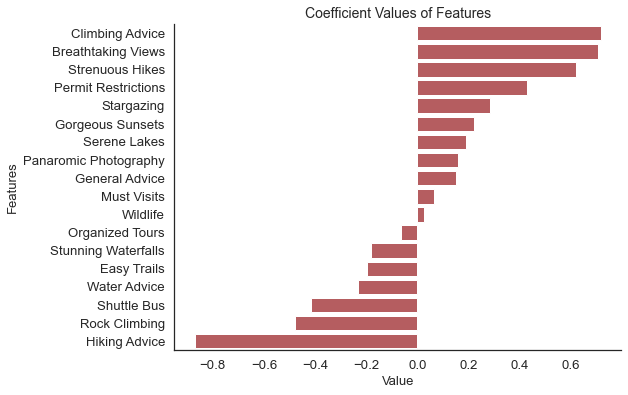

In [303]:
coef_df = pd.DataFrame(zip(topics_columns,logreg_model['model'].coef_[0]))

coef_df.columns = ['Features','Coefficients']
coef_df.sort_values(by='Coefficients', ascending = False, inplace=True)

plt.figure(figsize=(8,6))
sns.barplot(y='Features', x ='Coefficients',data=coef_df, color = 'r')
plt.title("Coefficient Values of Features", fontsize=14)
plt.xlabel('Value', fontsize=13)
plt.ylabel('Features', fontsize=13)
sns.despine()
plt.rcParams.update({'font.size': 14})

coef_df

In [61]:
# Adding a column for review year to get count of reviews 
df['review_year'] = df.review_date.dt.year
df_preds['review_year'] = df_preds.review_date.dt.year

#Grouping at Attraction level to get average scores for each topic. Will be used later for Misc. purposes
df_attractions = df.groupby('attraction_name')[topics_columns].mean()

In [10]:
df_attractions.to_csv("Attractions_Topics_Summary_Scores.csv", index=True)
df_attractions

,Breathtaking Views,Must Visits,Panaromic Photography,Strenuous Hikes,Easy Trails,Gorgeous Sunsets,Stunning Waterfalls,Serene Lakes,Wildlife,Stargazing,Shuttle Bus,Organized Tours,Permit Restrictions,Water Advice,Rock Climbing,Climbing Advice,General Advice,Hiking Advice
attraction_name,,,,,,,,,,,,,,,,,,
El Capitan,0.341177,0.171879,0.087060,0.016488,0.035973,0.071025,0.058825,0.085370,0.049967,0.114202,0.047076,0.033305,0.007903,0.077651,0.032573,0.597938,0.103256,0.039195
Glacier Point,0.735162,0.274137,0.082794,0.039012,0.098117,0.215686,0.143145,0.228298,0.218663,0.151747,0.182586,0.077023,0.018694,0.076822,0.072747,0.134181,0.341302,0.127227
Half Dome,0.440487,0.166969,0.089488,0.190952,0.054899,0.416424,0.161618,0.077505,0.178600,0.230160,0.030428,0.027435,0.390423,0.260649,0.257210,0.416166,0.215452,0.311953
Mariposa Grove of Giant Sequoias,0.090085,0.272097,0.055867,0.066293,0.159407,0.337027,0.068437,0.134396,0.222702,0.121936,0.258422,0.654993,0.026492,0.075429,0.118240,0.108710,0.289936,0.182387
Mist Trail,0.419429,0.112167,0.048001,0.601815,0.149687,0.744333,0.660573,0.025731,0.164226,0.094552,0.072012,0.011990,0.129339,0.354302,0.291003,0.313627,0.252181,0.409142
Tioga Pass,0.450065,0.167824,0.079119,0.039183,0.034505,0.081331,0.049288,0.754298,0.143240,0.128757,0.005205,0.019140,0.010732,0.059668,0.086349,0.165423,0.134241,0.122055
Tunnel View,0.762938,0.202118,0.175293,0.013315,0.024065,0.053276,0.168619,0.122913,0.053010,0.143241,0.061797,0.054774,0.006797,0.016697,0.042436,0.095054,0.389265,0.063924
Vernal Fall,0.399476,0.114679,0.048078,0.537619,0.143328,0.654508,0.730772,0.020484,0.128043,0.054610,0.051584,0.008413,0.099274,0.400727,0.214025,0.268621,0.203638,0.309020
Yosemite Falls,0.342450,0.224641,0.076924,0.115377,0.287618,0.317388,0.795462,0.042720,0.127544,0.116559,0.082075,0.029195,0.052579,0.343594,0.110008,0.222037,0.200960,0.170982


### Negative Reviews Analysis

In [13]:
# df_preds.groupby('Outlook_Sentiment')[topics_columns].sum()

df_neg = df_preds[df_preds.Outlook_Sentiment == 'Negative'][topics_columns].sum()/df_preds[topics_columns].sum() * 100
df_neg.sort_values(ascending=False)

Shuttle Bus              5.551020
Organized Tours          5.271318
Hiking Advice            5.206813
Rock Climbing            4.676754
Wildlife                 4.228571
Water Advice             4.226021
Serene Lakes             4.002426
Easy Trails              3.920118
General Advice           3.869499
Stunning Waterfalls      3.807723
Stargazing               3.668478
Must Visits              3.668122
Gorgeous Sunsets         3.184893
Panaromic Photography    3.140097
Strenuous Hikes          2.716186
Permit Restrictions      2.525832
Climbing Advice          2.497809
Breathtaking Views       2.356470
dtype: float64

Looking at the above, the results are not entirely surprising - since shuttle buses and organized Tours are areas were people may tend to vent negative impressions more often than nought.  
Likewise, people with negative experiences would also share more advice based off their experience.  

### Recommenders System

In [250]:
df_attractions.mean(axis=0)

Breathtaking Views       0.430521
Must Visits              0.208346
Panaromic Photography    0.082009
Strenuous Hikes          0.167203
Easy Trails              0.108094
Gorgeous Sunsets         0.311014
Stunning Waterfalls      0.311494
Serene Lakes             0.174669
Wildlife                 0.159718
Stargazing               0.150526
Shuttle Bus              0.101480
Organized Tours          0.101320
Permit Restrictions      0.077068
Water Advice             0.181343
Rock Climbing            0.135201
Climbing Advice          0.255498
General Advice           0.247322
Hiking Advice            0.193259
dtype: float64

#### Testing the recommender

In [11]:
user_inputs = defaultdict(int)
user_inputs['Must Visits'] = 1
user_inputs['Easy Hikes'] = 1
user_inputs['Wildlife'] = 1

rof.yosemite_attraction_reco(df_attractions, user_weights = user_inputs)

['Yosemite Valley', 'Mariposa Grove of Giant Sequoias', 'Glacier Point']

In [12]:
user_inputs = defaultdict(int)
user_inputs['Breathtaking Views'] = 1
user_inputs['Panaromic Photography'] = 1
user_inputs['Wildlife'] = 1
rof.yosemite_attraction_reco(df_attractions, user_weights = user_inputs)

['Tunnel View', 'Glacier Point', 'Tioga Pass']

In [63]:
# Adding up mentions for each topic across the years for visualization purposes

df_topics_years = df_preds.groupby('review_year')[topics_columns].sum().loc[2013:]
df_topics_years

,Breathtaking Views,Must Visits,Panaromic Photography,Strenuous Hikes,Easy Trails,Gorgeous Sunsets,Stunning Waterfalls,Serene Lakes,Wildlife,Stargazing,Shuttle Bus,Organized Tours,Permit Restrictions,Water Advice,Rock Climbing,Climbing Advice,General Advice,Hiking Advice
review_year,,,,,,,,,,,,,,,,,,
2013,265,148,62,160,110,313,322,94,125,91,79,151,92,175,131,173,173,177
2014,312,207,62,204,149,416,376,158,181,132,123,270,102,234,161,225,217,226
2015,834,387,118,327,261,644,642,270,277,204,193,207,145,358,215,350,383,326
2016,882,339,115,334,207,603,620,280,276,221,198,70,151,371,249,354,439,351
2017,761,289,146,243,169,434,516,199,211,175,138,57,102,292,190,338,394,246
2018,676,329,120,159,141,353,364,229,231,228,190,140,83,180,143,260,367,229
2019,517,327,114,137,123,284,352,222,220,221,185,133,50,193,126,260,361,200
2020,96,45,18,20,29,56,63,33,39,44,19,14,12,31,32,45,54,31


### Topic Frequency Over Time

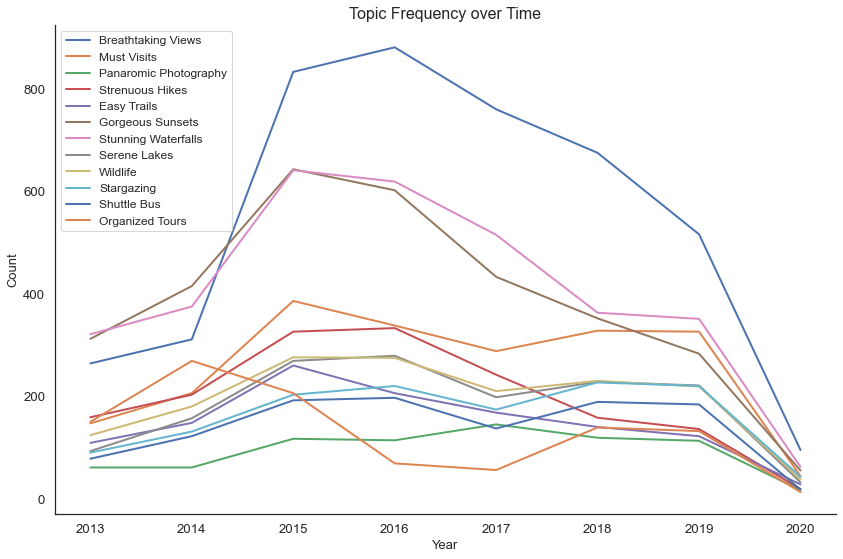

In [125]:
plt.figure(figsize=(14,9))

for column in df_topics_years.columns[:12]:
    plt.plot(df_topics_years.loc[:,column], linewidth = 2, label = column)

sns.set(style='white')
plt.title('Topic Frequency over Time', fontsize=16)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Count', fontsize=13)
plt.legend(loc='upper left', fontsize=12)
sns.despine()

### Topic Frequency

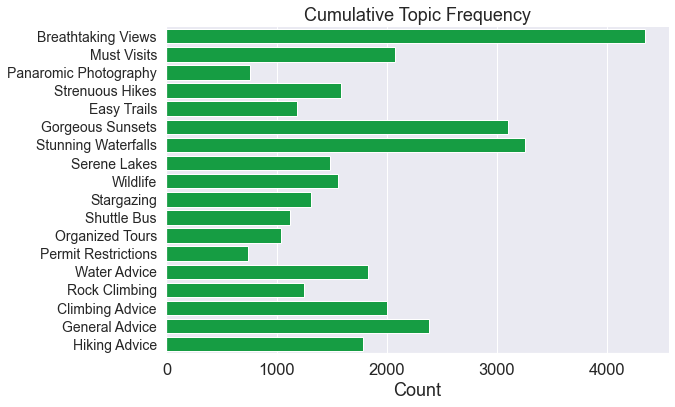

In [64]:
# sns.barplot(y=df_preds.sum(axis=0))

df_total_topic_counts = df_topics_years.sum(axis=0)
sns.barplot(y=df_total_topic_counts.index, x=df_total_topic_counts.values, color='#00b33c')
plt.title("Cumulative Topic Frequency")
plt.yticks(fontsize = 14)
plt.xlabel("Count")
sns.despine()
plt.savefig("cumulative_topic_frequency.png", dpi=300, bbox_inches='tight')

del df_total_topic_counts

### Reviews Over Time

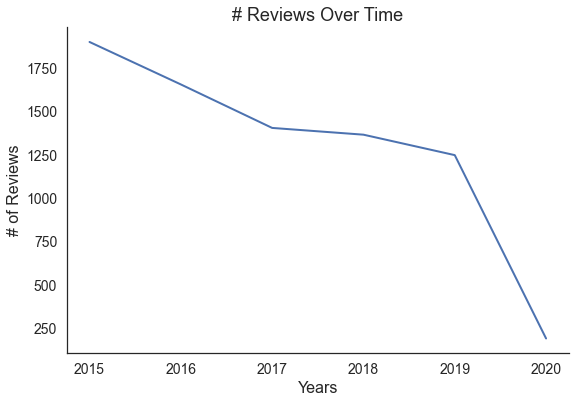

<Figure size 648x432 with 0 Axes>

In [143]:
df_reviews_years = df.groupby('review_year').review_link.count()[-6:]

sns.set(style='white')
plt.plot(df_reviews_years, linewidth = 2,)
plt.title("# Reviews Over Time",  fontsize = 18)
plt.xlabel("Years",  fontsize = 16)
plt.ylabel("# of Reviews",  fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine()
plt.show()
plt.savefig("Reviews_over_time.png", dpi=300)
plt.savefig("Reviews_over_time_transparent.png", dpi=300, transparent = True)

### K-Means Clustering

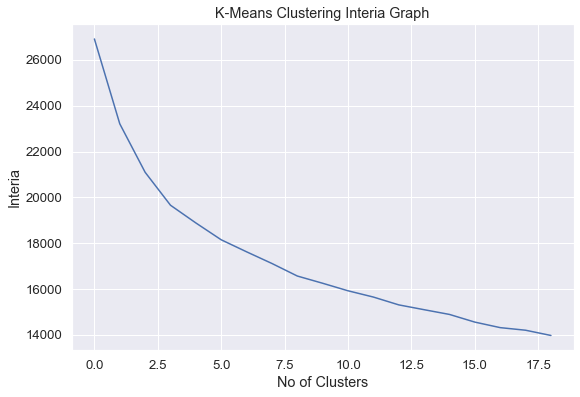

In [29]:
#KMeans Clustering to determine best number of clusters

inertias = []
for i in range(1, 20):
    km = KMeans(n_clusters=i)
    km.fit(df[topics_columns])
    inertia = km.inertia_
    inertias.append(inertia)
    
plt.plot(inertias)
plt.title("K-Means Clustering Interia Graph")
plt.xlabel("No of Clusters")
plt.ylabel("Interia")
plt.show()

Looking at the above graph, 5 seems to be a good to be a good cut-off point to use for clustering & visualization

In [46]:
def display_cluster(X, km=[], num_clusters=0):
    
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    
    if num_clusters == 0:
        plt.scatter(X[:,0], X[:,1], c=color[0], alpha=alpha, s=s)
        
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0], X[km.labels_==i,1], c = color[i], alpha = alpha, s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [42]:
num_clusters = 5

km = KMeans(n_clusters=num_clusters)
km.fit(df[topics_columns])

# display_cluster(df[topics_columns], km, num_clusters)

KMeans(n_clusters=5)

#### Word Cloud

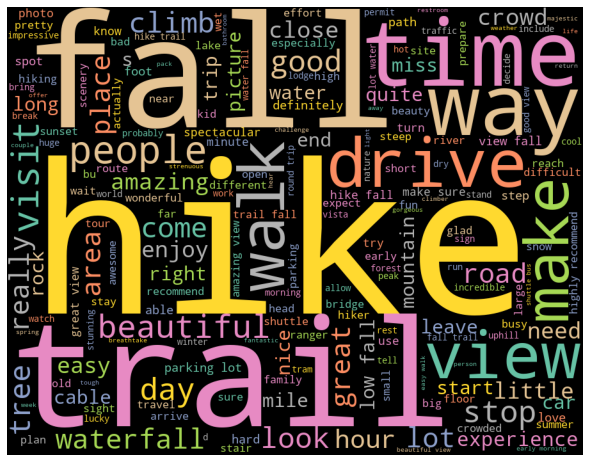

In [275]:
# Word cloud

all_reviews_clean = ' '.join(df.review_clean_modeling.tolist())

wordcloud = WordCloud(width = 900, height = 700, 
                background_color ='black', 
                min_font_size = 10, colormap='Set2').generate(all_reviews_clean) 
  
# plot word cloud                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
# plt.savefig('wordcloud.png', dpi=300)

### Topic Distribution across each attraction
A Bargraph for each attraction showing how they differ or are similar across the various topics.

In [251]:
def plot_topic_distribution(row, genre, color):
    plt.figure(figsize=(4, 3))
    sns.barplot(x=matrix.columns[1:], y=matrix.iloc[row, 1:], palette=color)
    plt.show()
    
# colors = ['plum','dodgerblue', 'palegreen','tomato']
# for i, genre in enumerate(matrix["Genre"]):
#     print(genre)
#     plot_topic_distribution(i, genre, [colors[i]])
#     print("\n")

In [155]:
imp_topics_columns = topics_columns[:12]

In [158]:
[row[np.argsort(row[imp_topics_columns].values)[-5:]] for _,row in df_attractions.iterrows()]

[Serene Lakes             0.085370
 Panaromic Photography    0.087060
 Stargazing               0.114202
 Must Visits              0.171879
 Breathtaking Views       0.341177
 Name: El Capitan, dtype: float64,
 Gorgeous Sunsets      0.215686
 Wildlife              0.218663
 Serene Lakes          0.228298
 Must Visits           0.274137
 Breathtaking Views    0.735162
 Name: Glacier Point, dtype: float64,
 Wildlife              0.178600
 Strenuous Hikes       0.190952
 Stargazing            0.230160
 Gorgeous Sunsets      0.416424
 Breathtaking Views    0.440487
 Name: Half Dome, dtype: float64,
 Wildlife            0.222702
 Shuttle Bus         0.258422
 Must Visits         0.272097
 Gorgeous Sunsets    0.337027
 Organized Tours     0.654993
 Name: Mariposa Grove of Giant Sequoias, dtype: float64,
 Wildlife               0.164226
 Breathtaking Views     0.419429
 Strenuous Hikes        0.601815
 Stunning Waterfalls    0.660573
 Gorgeous Sunsets       0.744333
 Name: Mist Trail, dtype: 

### T-SNE

In [14]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)

# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807

C:\Users\Navish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


,Breathtaking Views,Must Visits,Panaromic Photography,Strenuous Hikes,Easy Trails,Gorgeous Sunsets,Stunning Waterfalls,Serene Lakes,Wildlife,Stargazing,Shuttle Bus,Organized Tours,Permit Restrictions,Water Advice,Rock Climbing,Climbing Advice,General Advice,Hiking Advice
1,0.999999,0.999999,0.999999,0.999999,0.054381,0.999999,0.999999,0.999999,0.999997,0.999999,0.999999,0.001726,0.999873,0.999999,0.999188,0.004974,0.999999,0.999999
49,0.999999,0.000911,0.000001,0.999999,0.014454,0.000002,0.000001,0.999999,0.999999,0.999836,0.999999,0.999999,0.000017,0.000002,0.999999,0.137920,0.999999,0.999910
74,0.000001,0.999999,0.000001,0.999999,0.072240,0.105291,0.000001,0.004145,0.999981,0.000934,0.999999,0.003667,0.000043,0.999999,0.999774,0.004752,0.401329,0.685327
80,0.999999,0.999999,0.999999,0.999999,0.000265,0.000416,0.000001,0.999999,0.999999,0.521326,0.000001,0.046829,0.998633,0.000017,0.015219,0.004506,0.999999,0.108610
158,0.999999,0.000087,0.000001,0.999999,0.999999,0.108034,0.000001,0.999997,0.002493,0.000132,0.000009,0.000670,0.000001,0.000002,0.015042,0.999999,0.999999,0.023687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10716,0.000001,0.000087,0.000001,0.999999,0.000265,0.999999,0.999999,0.000105,0.000768,0.000672,0.000009,0.000064,0.000011,0.000002,0.006456,0.004292,0.999999,0.104266
10718,0.000001,0.000087,0.000001,0.999999,0.000264,0.007543,0.999999,0.000104,0.999579,0.000124,0.000009,0.000064,0.000001,0.999999,0.000010,0.004671,0.005773,0.990207
10720,0.000001,0.000087,0.000001,0.999999,0.006339,0.999999,0.999999,0.000359,0.000081,0.000081,0.000009,0.000064,0.998585,0.000002,0.999689,0.014089,0.004059,0.010578
10721,0.999999,0.000087,0.000001,0.998998,0.007441,0.005850,0.999999,0.000104,0.977870,0.004123,0.000009,0.000064,0.000041,0.999999,0.999978,0.315610,0.001140,0.006689


In [59]:
X = TSNE(random_state=RS, n_jobs=-1).fit_transform(df[topics_columns])

y = df[topics_columns].values.argmax(axis=1)

In [37]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("colorblind", 19))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(18):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

C:\Users\Navish\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Navish\anaconda3\lib\site-packages\numpy\core\_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


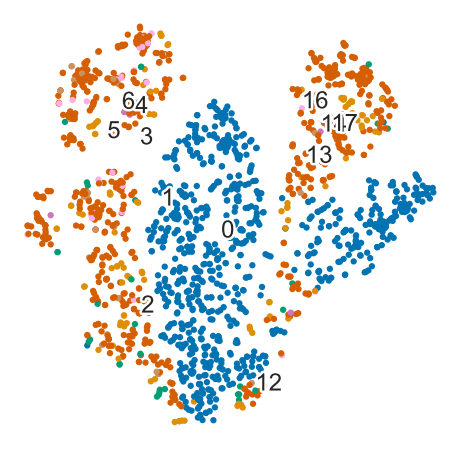

In [54]:
scatter(X, y);

In [38]:
topics_columns

['Breathtaking Views',
 'Must Visits',
 'Panaromic Photography',
 'Strenuous Hikes',
 'Easy Trails',
 'Gorgeous Sunsets',
 'Stunning Waterfalls',
 'Serene Lakes',
 'Wildlife',
 'Stargazing',
 'Shuttle Bus',
 'Organized Tours',
 'Permit Restrictions',
 'Water Advice',
 'Rock Climbing',
 'Climbing Advice',
 'General Advice',
 'Hiking Advice']